In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
weights, params = [], []

In [4]:
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

In [5]:
weights = np.array(weights)

In [6]:
plt.plot(params, weights[:, 0], label='petal length')

In [7]:
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')

In [8]:
plt.ylabel('weight coefficient')

Text(0,0.5,'weight coefficient')

In [9]:
plt.xlabel('c')

Text(0.5,0,'c')

In [10]:
plt.legend(loc='upper left')

In [11]:
plt.xscale('log')

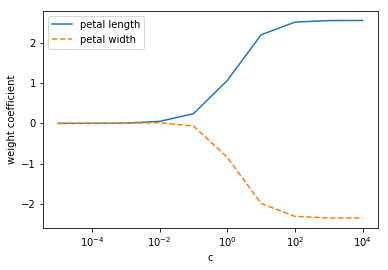

In [12]:
plt.show()